<p style="float:right">
<img src="images/logos/cu.png" style="display:inline" />
<img src="images/logos/cires.png" style="display:inline" />
<img src="images/logos/nasa.png" style="display:inline" />
</p>

# Python, Jupyter & pandas: Module 3

## Viewing geolocated data

In Module 2, we retrieved NSIDC snow-cover data in the northern hemisphere from an OpenDAP server. Let's pull that data again for use in this notebook:

In [1]:
import netCDF4
import numpy as np
url = ('http://opendap.apps.nsidc.org:80/opendap/DATASETS/'
       'nsidc0530_MEASURES_nhsnow_daily25/2012/nhtsd25e2_20120101_v01r01.nc?'
       'latitude[0:1:719][0:1:719],'
       'longitude[0:1:719][0:1:719],'
       'merged_snow_cover_extent[0:1:0][0:1:719][0:1:719]'
)
dataset = netCDF4.Dataset(url)
latitude = np.array(dataset.variables['latitude'])
longitude = np.array(dataset.variables['longitude'])
msce = np.array(dataset.variables['merged_snow_cover_extent'])[0, :, :]

And now let's pull in some graphics support now and get ready to plot our snow-cover data.

In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

It will be helpful to have an underlying map image to better interpret our data, so let's be sure we can at least do that:

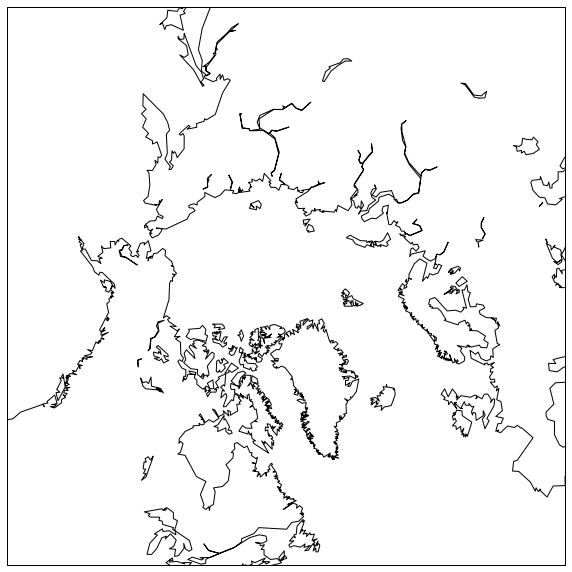

In [3]:
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()
plt.draw()

We can ask for more interesting background imagery -- though, in general, we won't in order to focus on the data.

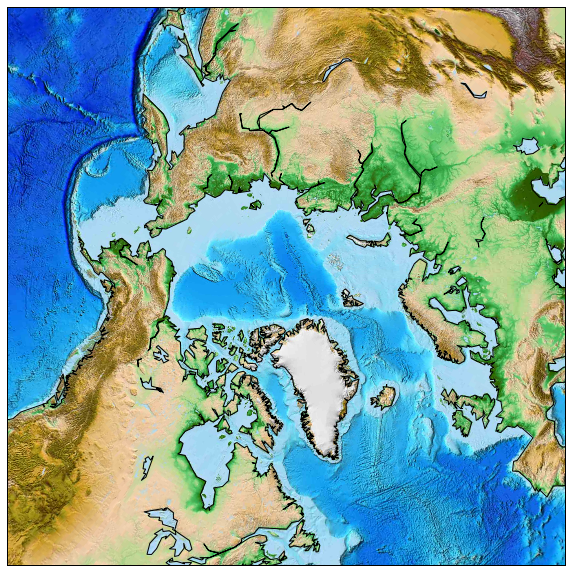

In [4]:
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()
map.etopo()
plt.draw()

Let's take a quick look back at the metadata for our Merged Snow Cover Extent variable:

In [5]:
dataset.variables['merged_snow_cover_extent']

<class 'netCDF4._netCDF4.Variable'>
int16 merged_snow_cover_extent(time, rows, cols)
    flag_meanings: modis_microwave_ims_report_snow modis_microwave_report_snow modis_ims_report_snow microwave_ims_report_snow modis_only_reports_snow microwave_only_reports_snow ims_only_reports_snow snow_free_land permanent_ice ocean
    flag_values: [10 11 12 13 14 15 16 20 30 40]
    _FillValue: -99
    comment: 10: Snow cover reported by modis_cloud_gap_filled, passive_microwave, ims, 11: Snow cover reported by modis_cloud_gap_filled, passive_microwave,  12: Snow cover reported by modis_cloud_gap_filled, ims, 13: Snow cover reported by passive_microwave, ims, 14: Snow cover reported by modis_cloud_gap_filled only, 15: Snow cover reported by passive_microwave only, 16: Snow cover reported by ims only, 20: Snow free land, 30: Permanent ice covered land, 40: Ocean
    valid_range: [10 40]
    coordinates: longitude latitude time
    long_name: Merged Snow Cover Extent
    grid_mapping: coord_system
u

So, the snow-cover variable is categorical (discrete), and consists of integers whose values represent snow cover from different sources, snow-free land, permanent ice-covered land, ocean, or a fill value.

As a reality check, let's find the would-be ocean points and plot them on our map:

## In addition to doing the following plots via array operatings, masking, etc., if the code ends up being more than a one- or two-liner, maybe factor it out into a function and re-use the function in later cells.

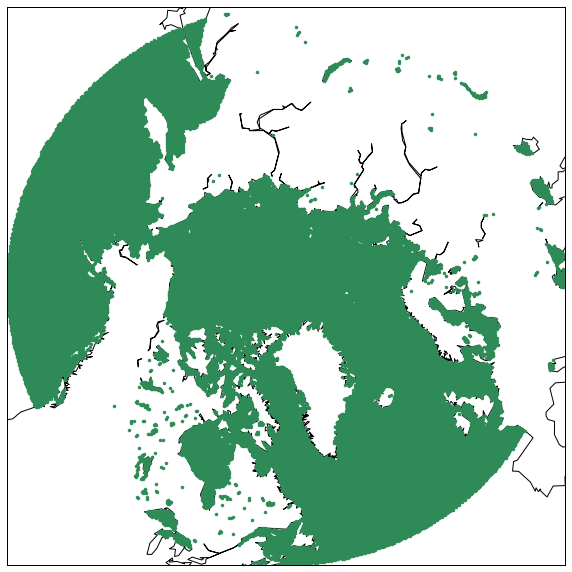

In [6]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='npstere', boundinglat=45, lon_0=300)
m.drawcoastlines()
row, col = np.where((latitude >= 45) & (msce == 40))
x, y = m(longitude[row,col], latitude[row,col])
m.plot(x, y, '.', color='SeaGreen')
plt.draw()

Seems legit.

Now, where's the snow? Values 10 through 16 in the merged snow-cover variable all indicate snow, so we'll accept anything in that range:

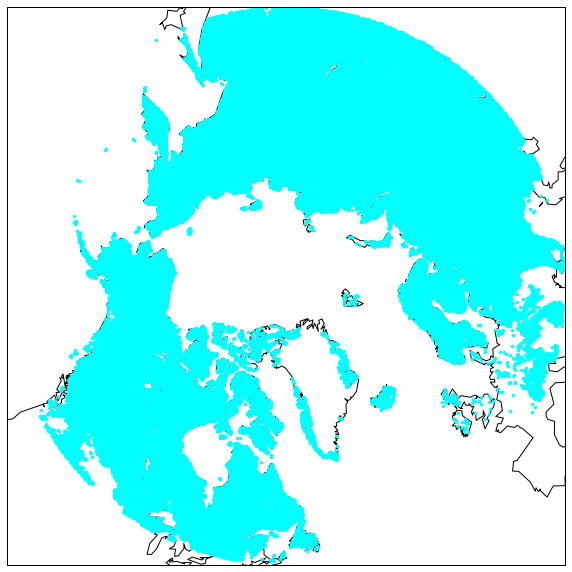

In [7]:
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()

row, col = np.where((latitude >= 45) & (msce >=10) & (msce <=17))
x, y = map(longitude[row,col], latitude[row,col])
map.plot(x, y, '.', color='Cyan')

plt.draw()

How about snow **or** permanent ice covered land?

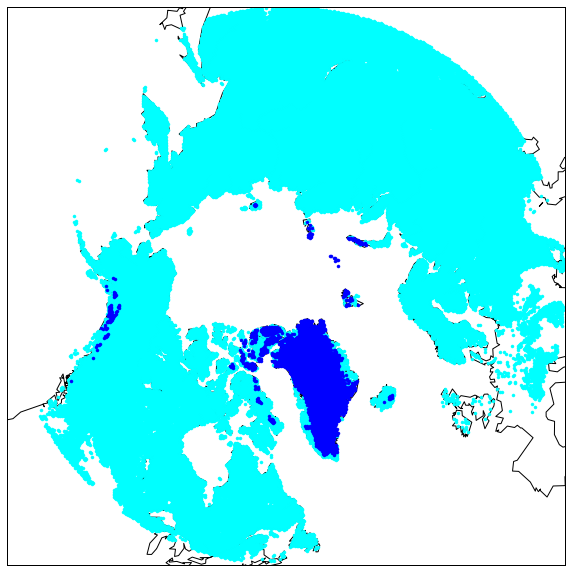

In [8]:
plt.figure(figsize=(10, 10))
map = Basemap(projection='npstere', boundinglat=45, lon_0=300)
map.drawcoastlines()

snow = (latitude >= 45) & (msce >=10) & (msce <=17)
ice = (latitude >= 45) & (msce == 30)

snow_col, snow_row = np.where(snow)
ice_col, ice_row = np.where(ice)

snow_x, snow_y = map(longitude[snow_col, snow_row], latitude[snow_col, snow_row])
map.plot(snow_x, snow_y, '.', color='Cyan')

ice_x, ice_y = map(longitude[ice_col, ice_row], latitude[ice_col, ice_row])
map.plot(ice_x, ice_y, '.', color='Blue')

plt.draw()

At the end of Module 2, we tried to use OpenDAP to retrieve data only in the area of Iceland. Let's execute that query again:

In [9]:
iceland_url = ('http://opendap.apps.nsidc.org:80/opendap/DATASETS/'
       'nsidc0530_MEASURES_nhsnow_daily25/2012/nhtsd25e2_20120101_v01r01.nc?'
       'latitude[453:1:476][310:1:338],'
       'longitude[453:1:476][310:1:338],'
       'merged_snow_cover_extent[0:1:0][453:1:476][310:1:338]'
)
iceland_dataset = netCDF4.Dataset(iceland_url)
iceland_latitude = np.array(iceland_dataset.variables['latitude'])
iceland_longitude = np.array(iceland_dataset.variables['longitude'])
iceland_msce = np.array(iceland_dataset.variables['merged_snow_cover_extent'])[0, :, :]

And now let's plot it on a map and see if the result makes sense:

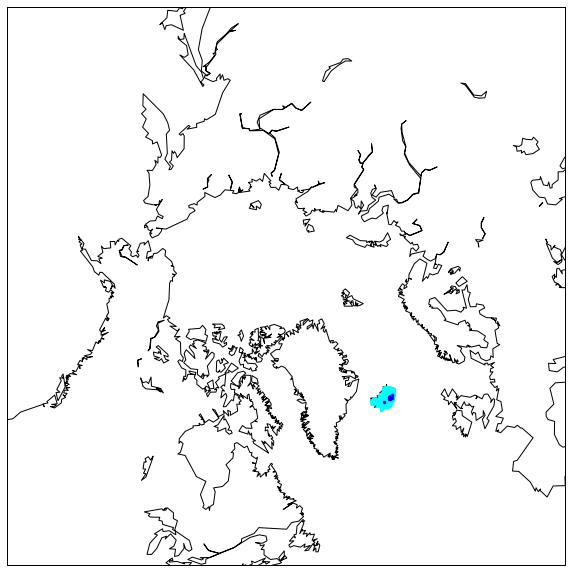

In [10]:

plt.figure(figsize=(10, 10))
m = Basemap(projection='npstere', boundinglat=45, lon_0=300)
m.drawcoastlines()

snow = (iceland_latitude >= 45) & (iceland_msce >=10) & (iceland_msce <=17)
ice = (iceland_latitude >= 45) & (iceland_msce == 30)

snow_col, snow_row = np.where(snow)
ice_col, ice_row = np.where(ice)

snow_x, snow_y = m(iceland_longitude[snow_col, snow_row], iceland_latitude[snow_col, snow_row])
m.plot(snow_x, snow_y, '.', color='Cyan')

ice_x, ice_y = map(iceland_longitude[ice_col, ice_row], iceland_latitude[ice_col, ice_row])
m.plot(ice_x, ice_y, '.', color='Blue')

plt.draw()

Looks about right, but let's get a closer look. Can we plot a map of just Iceland?

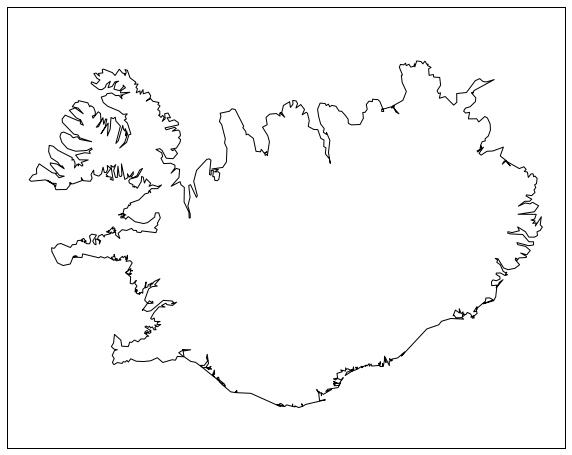

In [11]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlon=-25, llcrnrlat=63, urcrnrlon=-13, urcrnrlat=67, resolution='i')
m.drawcoastlines()
plt.draw()

Let's plot the snow- and ice-cover points. We can re-use the `[snow|ice]_[col|row]` variables we computed previously, but need to recompute the coordinates since we are using a different map projection (Mercator, instead of North Polar Stereographic). Let's also make the points bigger to fill in the space better.

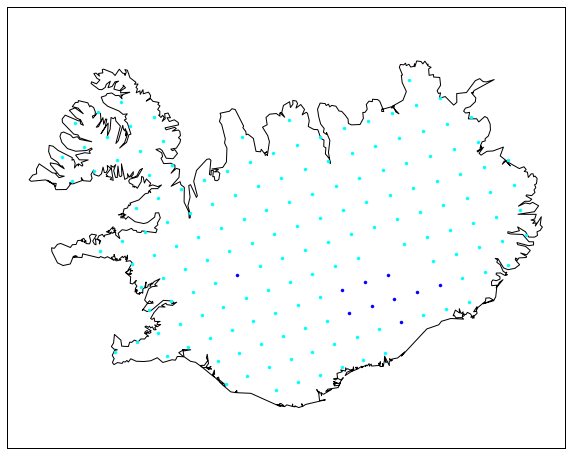

In [12]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlon=-25, llcrnrlat=63, urcrnrlon=-13, urcrnrlat=67, resolution='i')
m.drawcoastlines()

snow_x, snow_y = m(iceland_longitude[snow_col, snow_row], iceland_latitude[snow_col, snow_row])
m.plot(snow_x, snow_y, '.', color='Cyan')

ice_x, ice_y = m(iceland_longitude[ice_col, ice_row], iceland_latitude[ice_col, ice_row])
m.plot(ice_x, ice_y, '.', color='Blue')

plt.draw()

If we add some (admittedly lo-res) background imagery, we can see that the permanent ice is located in what appear to be sensible places:

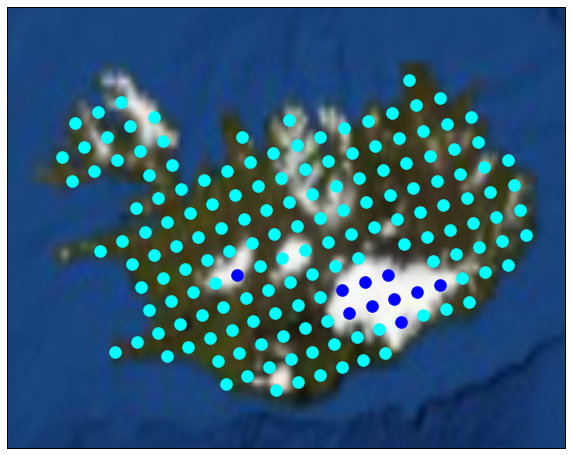

In [13]:
plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlon=-25, llcrnrlat=63, urcrnrlon=-13, urcrnrlat=67, resolution='i')
m.plot(snow_x, snow_y, '.', color='Cyan', markersize='24')
m.plot(ice_x, ice_y, '.', color='Blue', markersize='24')
m.bluemarble()
plt.draw()

In Module 4, we'll look at using pandas to do some data analysis.